# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Karinda Amelia
- Email: karindaamelia21@gmail.com
- ID Dicoding: karindaamelia

## Persiapan

### Menyiapkan library yang dibutuhkan

Pada tahap ini, semua pustaka (library) dan paket (packages) yang dibutuhkan dalam proses analisis dan pemodelan data diimpor

In [ ]:
# General purpose and system utilities
import time
import warnings
import joblib

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature handling
from sklearn.preprocessing import LabelEncoder, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_classif

# Handling imbalanced datasets
from imblearn.combine import SMOTEENN

# Model selection and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [147]:
# Suppress warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

### Menyiapkan data yang akan digunakan

Dataset `data.csv` dibaca menggunakan `pandas` dan ditampilkan lima baris pertama dengan gradasi warna pada kolom numerik untuk visualisasi yang lebih jelas.


In [148]:
# Load dataset
data = pd.read_csv("data/data.csv", sep =";")
data.head().style.background_gradient(cmap="viridis")

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.000000,1,19,12,5,9,127.300000,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.800000,1.400000,1.740000,Dropout
1,1,15,1,9254,1,1,160.000000,1,1,3,3,3,142.500000,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.900000,-0.300000,0.790000,Graduate
2,1,1,5,9070,1,1,122.000000,1,37,37,9,9,124.800000,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.800000,1.400000,1.740000,Dropout
3,1,17,2,9773,1,1,122.000000,1,38,37,5,3,119.600000,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.400000,-0.800000,-3.120000,Graduate
4,2,39,1,8014,0,1,100.000000,1,37,38,9,9,141.500000,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.900000,-0.300000,0.790000,Graduate


## Data Understanding

Pada tahap Data Understanding, dilakukan analisis mendalam terhadap struktur dan distribusi data dalam dataset. Tujuan dari tahap ini adalah untuk memahami karakteristik data sebelum dilakukan pemodelan lebih lanjut. Analisis ini mencakup dua aspek utama: struktur data dan distribusi serta korelasi antar variabel. Dengan memahami kedua aspek tersebut, kita dapat mengidentifikasi potensi masalah, seperti duplikasi, missing values, atau pencilan, yang dapat mempengaruhi hasil pemodelan.

**1. Memahami Struktur Data (Understanding the Data Structure)**

Langkah pertama adalah memahami struktur dataset secara keseluruhan. Tahap ini bertujuan untuk mengenali komponen-komponen dalam dataset dan memastikan bahwa data dalam kondisi yang siap untuk dianalisis lebih lanjut. Tahapan-tahapan yang dilakukan dalam memahami struktur data meliputi:
- Menampilkan jumlah baris dan kolom dalam dataset 
- Mengidentifikasi tipe data pada setiap kolom
- Mengidentifikasi kolom bertipe numerikal
- Mengidentifikasi kolom bertipe kategorikal
- Melihat jumlah nilai unik dalam setiap kolom
- Mengidentifikasi duplikasi data
- Mengidentifikasi jumlah nilai kosong (missing values)
- Mengidentifikasi pencilan (outlier) 

**2. Analisis Distribusi dan Korelasi (Distribution and Correlation Analysis)**

Setelah memahami struktur data, tahap berikutnya adalah menganalisis distribusi data serta hubungan antar variabel dalam dataset. Tahapan ini bertujuan untuk memahami pola data dan mencari hubungan yang signifikan antar variabel yang dapat memengaruhi model. Langkah-langkah analisis distribusi dan korelasi yang dilakukan antara lain:
- Menampilkan statistik deskriptif
- Menganalisis distribusi variabel target (Status)
- Menganalisis distribusi variabel numerikal
- Menganalisis matriks korelasi

**1. Memahami Struktur Data (Understanding the Data Structure)**

In [149]:
# 1. Number of rows and columns in the dataset
print("Dataset structure:")
print("Number of rows:",data.shape[0])
print("Number of columns:", data.shape[1])

Dataset structure:
Number of rows: 4424
Number of columns: 37


In [150]:
# 2. Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [151]:
# 3. List of numerical columns
numerical_columns = data.select_dtypes(exclude="object").columns
print("Numerical Variables:", numerical_columns)

Numerical Variables: Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricu

In [152]:
# 4. List of categorical columns
categorical_columns = data.select_dtypes(include="object").columns
print("Categorical Variables:", categorical_columns)

Categorical Variables: Index(['Status'], dtype='object')


In [153]:
# 5. Unique values
print("Total Unique Values in Each Column:")
data.nunique()

Total Unique Values in Each Column:


Marital_status                                    6
Application_mode                                 18
Application_order                                 8
Course                                           17
Daytime_evening_attendance                        2
Previous_qualification                           17
Previous_qualification_grade                    101
Nacionality                                      21
Mothers_qualification                            29
Fathers_qualification                            34
Mothers_occupation                               32
Fathers_occupation                               46
Admission_grade                                 620
Displaced                                         2
Educational_special_needs                         2
Debtor                                            2
Tuition_fees_up_to_date                           2
Gender                                            2
Scholarship_holder                                2
Age_at_enrol

In [154]:
# Unique values of numerical columns
for col in numerical_columns:
    print(f"{col} : {data[col].unique()}")


Marital_status : [1 2 4 3 5 6]
Application_mode : [17 15  1 39 18 53 44 51 43  7 42 16  5  2 10 57 26 27]
Application_order : [5 1 2 4 3 6 9 0]
Course : [ 171 9254 9070 9773 8014 9991 9500 9238 9670 9853 9085 9130 9556 9147
 9003   33 9119]
Daytime_evening_attendance : [1 0]
Previous_qualification : [ 1 19 42 39 10  3 40  2  4 12 43 15  6  9 38  5 14]
Previous_qualification_grade : [122.  160.  100.  133.1 142.  119.  137.  138.  139.  136.  133.  110.
 149.  127.  135.  140.  125.  126.  151.  115.  150.  143.  130.  120.
 103.  154.  132.  167.  129.  141.  116.  148.  118.  106.  121.  114.
 124.  123.  113.  111.  131.  158.  146.  117.  153.  178.   99.  134.
 128.  170.  155.  145.  152.  112.  107.  156.  188.   96.  161.  166.
 147.  144.  102.  101.  180.  172.  105.  108.  165.  190.  162.  164.
 163.  159.  117.4 175.  133.8 176.  168.  139.3  97.  157.  140.8 184.4
 148.9 109.  174.  182.  138.6  95.  154.4 163.3 145.7 123.9 124.4 169.
 177.  138.7 119.1 118.9 126.6]
Nacion

In [155]:
# Unique values of categorical columns
for col in categorical_columns:
    print(f"\nDistribution of {col} column:")
    value_counts = data[col].value_counts()
    display(value_counts.to_frame().style.background_gradient(cmap="viridis"))


Distribution of Status column:


,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


In [156]:
# 6. Check duplicated data
print("Duplicated values :", data.duplicated().sum())

Duplicated values : 0


In [157]:
# 7. Total missing values in each column
missing_values = data.isna().sum()

print("Missing Value:")
display(missing_values.to_frame(name="Total Missing Value").style.background_gradient("viridis"))

Missing Value:


,Total Missing Value
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [158]:
# 8. Check outliers
outlier_info = []

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_count = ((data[col] < lower_bound) | (data[col] > upper_bound)).sum()

    outlier_info.append({
        "Column": col,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outlier Count": outlier_count,
        "Outlier Percentage": (outlier_count / len(data)) * 100
    })

outlier_data = pd.DataFrame(outlier_info)

display(outlier_data.style.background_gradient(cmap="viridis"))


,Column,Lower Bound,Upper Bound,Outlier Count,Outlier Percentage
0,Marital_status,1.000000,1.000000,505,11.415009
1,Application_mode,-56.000000,96.000000,0,0.000000
2,Application_order,-0.500000,3.500000,541,12.228752
3,Course,8378.500000,10262.500000,442,9.990958
4,Daytime_evening_attendance,1.000000,1.000000,483,10.917722
5,Previous_qualification,1.000000,1.000000,707,15.981013
6,Previous_qualification_grade,102.500000,162.500000,179,4.046112
7,Nacionality,1.000000,1.000000,110,2.486438
8,Mothers_qualification,-50.500000,89.500000,0,0.000000
9,Fathers_qualification,-48.000000,88.000000,0,0.000000


**2. Analisis Distribusi dan Korelasi (Distribution and Correlation Analysis)**

In [159]:
# 1. Descriptive statistics
data_desc_stat = (
    data[numerical_columns].describe().T.style
    .background_gradient(cmap="viridis")
    .set_caption("Descriptive Statistics of Numeric Variables")
)

data_desc_stat

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.000000,1.178571,0.605747,1.000000,1.000000,1.000000,1.000000,6.000000
Application_mode,4424.000000,18.669078,17.484682,1.000000,1.000000,17.000000,39.000000,57.000000
Application_order,4424.000000,1.727848,1.313793,0.000000,1.000000,1.000000,2.000000,9.000000
Course,4424.000000,8856.642631,2063.566416,33.000000,9085.000000,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.000000,0.890823,0.311897,0.000000,1.000000,1.000000,1.000000,1.000000
Previous_qualification,4424.000000,4.577758,10.216592,1.000000,1.000000,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.000000,132.613314,13.188332,95.000000,125.000000,133.100000,140.000000,190.000000
Nacionality,4424.000000,1.873192,6.914514,1.000000,1.000000,1.000000,1.000000,109.000000
Mothers_qualification,4424.000000,19.561935,15.603186,1.000000,2.000000,19.000000,37.000000,44.000000
Fathers_qualification,4424.000000,22.275316,15.343108,1.000000,3.000000,19.000000,37.000000,44.000000


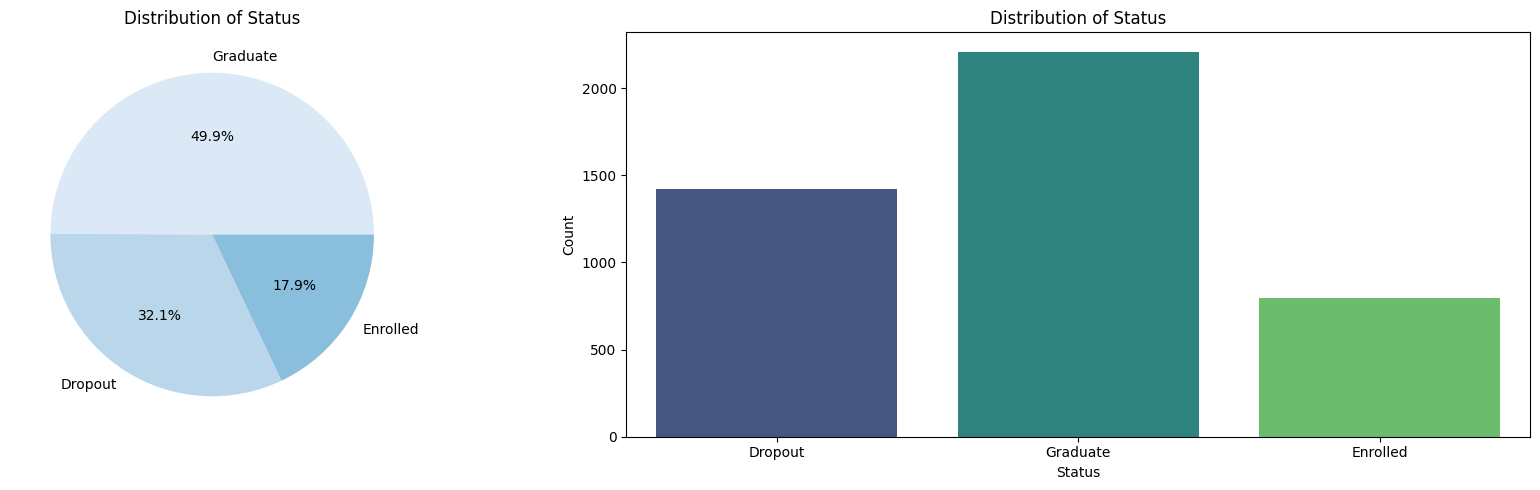

In [160]:
# 2. Distribution of target: status
fig, axes = plt.subplots(1, 2, figsize=(18,5))

# Plot 1: Pie chart status
status_count = data["Status"].value_counts()
axes[0].pie(status_count, labels=status_count.index, autopct="%1.1f%%", colors=sns.color_palette("Blues"))
axes[0].set_title("Distribution of Status")

# Plot 2: countplot status
sns.countplot(x="Status", data=data, palette="viridis", ax=axes[1])
axes[1].set_title("Distribution of Status")
axes[1].set_xlabel("Status")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


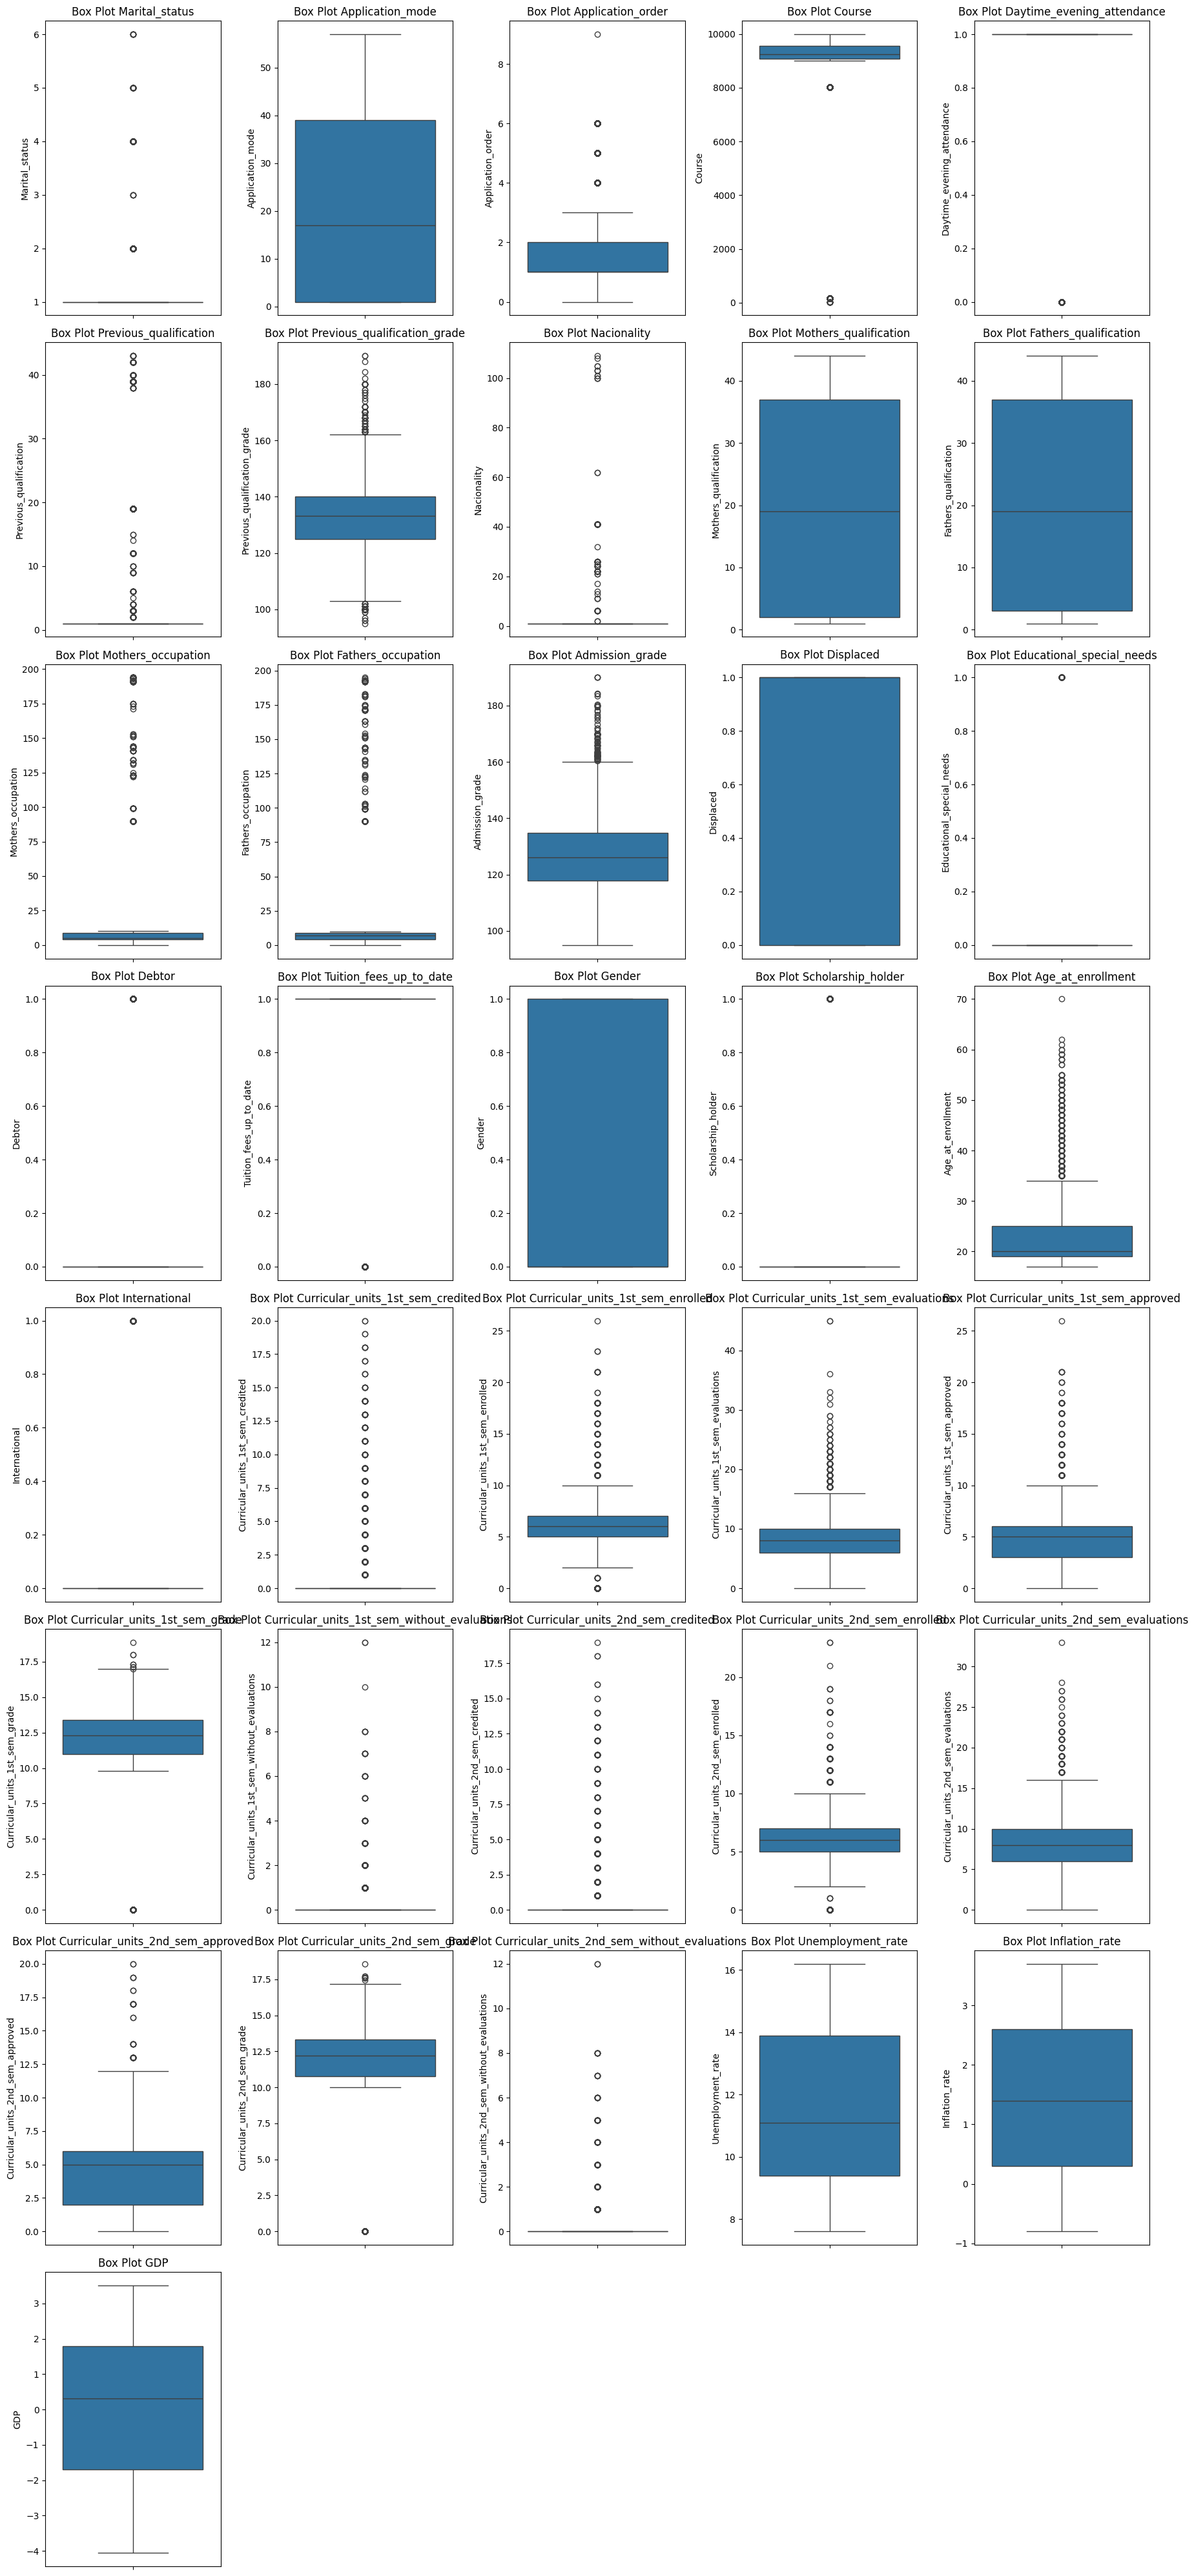

In [161]:
# 3. Distribution of numerical variables
# Create box plot untuk for each numerical variable
num_vars = len(numerical_columns)
ncols = 5
nrows = int(np.ceil(num_vars / ncols)) # Dynamically determine the number of rows based on the number of variables

# Create subplots with sizes adjusted to the number of variables
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 5 * nrows))
axes = axes.flatten()

# Plot box plot for each numerical variable
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(f"Box Plot {col}")

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

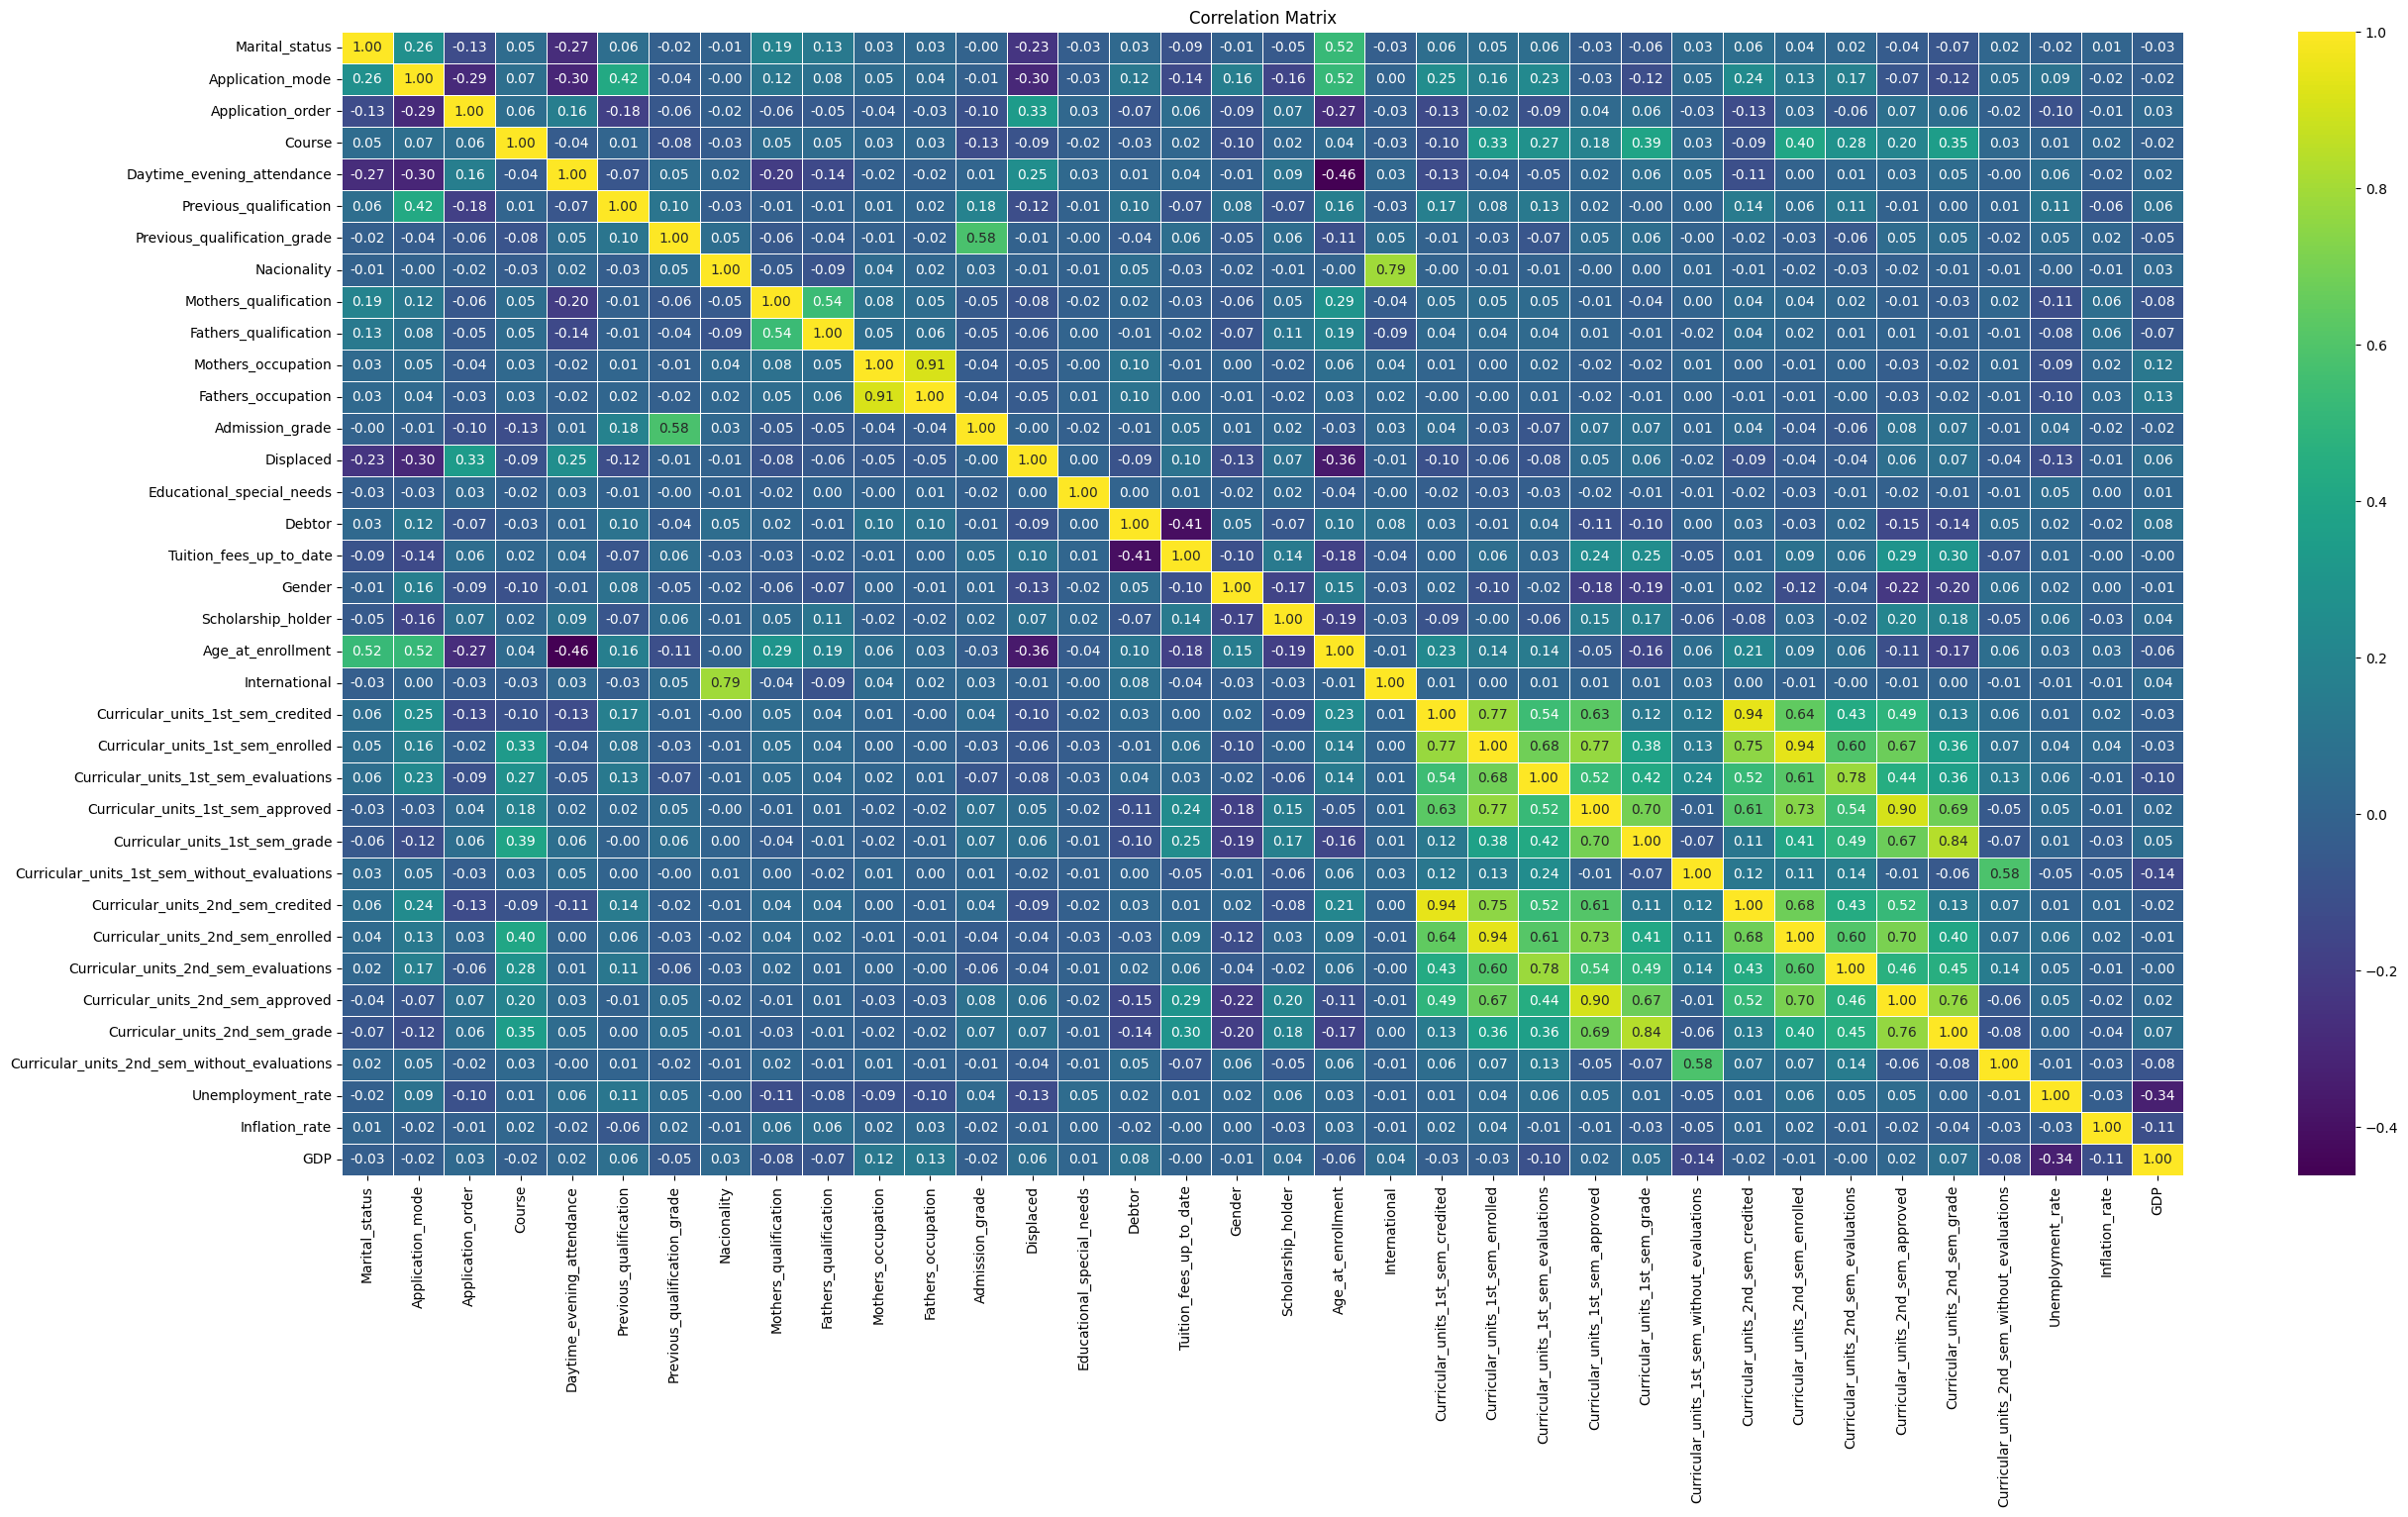

In [162]:
# 4. Correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(30, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.7)
plt.title("Correlation Matrix")
plt.show()

## Data Preparation / Preprocessing

Pada tahap data preparation atau preprocessing, dilakukan serangkaian langkah penting untuk mempersiapkan data mentah menjadi data yang bersih, terstruktur, dan siap digunakan dalam proses pemodelan machine learning. Langkah-langkah ini bertujuan untuk meningkatkan kualitas data dan memastikan model yang dibangun dapat belajar dengan optimal dari data yang tersedia. Tahapan-tahapan preprocessing yang dilakukan adalah sebagai berikut:

- **Handling Outlier**  
    Langkah awal dalam preprocessing adalah mengidentifikasi dan menangani nilai pencilan (outliers) yang dapat mengganggu distribusi data dan memengaruhi kinerja model. Outlier yang signifikan dapat menyebabkan bias dalam prediksi dan interpretasi model.

- **Feature Engineering**  
    Pada tahap ini, dilakukan pembuatan fitur baru yang merepresentasikan informasi penting berdasarkan kombinasi atau transformasi fitur yang sudah ada. Tujuannya adalah mengekstraksi informasi tambahan yang dapat meningkatkan akurasi model dalam memahami pola dari data.

- **Label Encoding**
    Fitur kategorikal dikonversi menjadi format numerik menggunakan teknik encoding agar dapat diproses oleh algoritma machine learning. 

- **Splitting Features and Label (Target)**
    Dataset dipisahkan menjadi dua komponen utama: fitur `X` yang digunakan sebagai input dan target/label `y` yaitu variabel yang ingin diprediksi. Pada kasus ini, `Status` digunakan sebagai variabel target.

- **Feature Selection**
    Proses ini bertujuan untuk memilih subset fitur terbaik yang paling relevan terhadap target, serta mengeliminasi fitur-fitur yang tidak memiliki kontribusi signifikan. Ini dapat meningkatkan akurasi dan efisiensi model.

- **Standardization**
    Dilakukan proses standardisasi terhadap data numerik agar semua fitur berada pada skala yang seragam. Proses ini penting terutama bagi algoritma yang sensitif terhadap perbedaan skala.

- **Data Splitting**
    Dataset dibagi menjadi dua bagian: data latih (training set) dan data uji (test set). Data latih digunakan untuk melatih model, sementara data uji digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat.

- **Data Resampling**
    Jika terdapat ketidakseimbangan jumlah kelas dalam variabel target, maka dilakukan teknik resampling (seperti SMOTE, oversampling, atau undersampling) untuk menghindari bias terhadap kelas mayoritas. Ini bertujuan agar model mampu belajar dengan adil terhadap semua kelas yang ada.

In [163]:
data_preprocessing = data.copy()

In [164]:
# 1. Handling Outlier
outlier_counts = {}
lower_bounds = {}
upper_bounds = {}

for col in numerical_columns:
    Q1 = data_preprocessing[col].quantile(0.25)
    Q3 = data_preprocessing[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    lower_bounds[col] = lower_bound
    upper_bounds[col] = upper_bound

    outlier_counts[col] = ((data_preprocessing[col] < lower_bound) | (data_preprocessing[col] > upper_bound)).sum()

# Apply capping only to valid numeric fields (not targets)
data_preprocessing[numerical_columns] = data_preprocessing[numerical_columns].clip(lower=pd.Series(lower_bounds), upper=pd.Series(upper_bounds), axis=1)

# Verification of results
outlier_counts_after = {
    col: ((data_preprocessing[col] < lower_bounds[col]) | (data_preprocessing[col] > upper_bounds[col])).sum()
    for col in numerical_columns
}

outlier_counts_after_data = pd.DataFrame.from_dict(outlier_counts_after, orient="index", columns=["The Number of Outliers After Capping"])

print("Number of Outliers After Capping in Each Column:")
display(outlier_counts_after_data.style.background_gradient(cmap="viridis"))


Number of Outliers After Capping in Each Column:


,The Number of Outliers After Capping
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


In [165]:
# 2. Feature Engineering

# Create a function to group similar categories
def group_marital_status(value):
    if value == 1:
        return "Single"
    elif value == 2:
        return "Married"
    else:
        return "Other"  # For widower, divorced, facto union, legally separated
    
def group_application_mode(value):
    if value in [1, 5, 16, 17, 18]:
        return "Regular_Phase"
    elif value in [2, 7, 10, 15, 26, 27, 39, 42, 43, 44, 51, 53, 57]:
        return "Special_Entry"
    else:
        return "Other"
    
def group_previous_qualification(value):
    if value in [19, 38]:
        return "Basic education"
    elif value == 1:
        return "Secondary"
    elif value == [2, 3, 4, 5, 6, 40, 43]:
        return "Higher education"
    elif value in [39, 42]:
        return "Professional/Specialized"
    elif value in [9, 10, 12, 14, 15]:
        return "Not Completed"
    else:
        return "Other"
    
def group_parent_qualification(value):
    if value in [2, 3, 4, 5, 40, 41, 43, 44]:
        return "High"   # Bachelor"s, Master"s, Doctorate, etc.
    elif value in [1, 6, 9, 10, 12, 14, 18, 19, 22, 26, 27, 29, 30, 37, 38, 39, 42]:
        return "Medium"     # Secondary, technical, incomplete higher ed, etc.
    else:   
        return "Low"    # Lower years, illiterate, minimal schooling
    
def group_age(value):
    if value < 20:
        return "Teen"
    elif 20 <= value < 25:
        return "Young Adult"
    elif 25 <= value < 30:
        return "Adult"
    else:
        return "Mature"

# Apply the transformations to create new categorical features
data_preprocessing["Marital_status_group"] = data_preprocessing["Marital_status"].apply(group_marital_status)
data_preprocessing["Application_mode_group"] = data_preprocessing["Application_mode"].apply(group_application_mode)
data_preprocessing["Previous_qualification_group"] = data_preprocessing["Previous_qualification"].apply(group_previous_qualification)
data_preprocessing["Mothers_qualification_group"] = data_preprocessing["Mothers_qualification"].apply(group_parent_qualification)
data_preprocessing["Fathers_qualification_group"] = data_preprocessing["Fathers_qualification"].apply(group_parent_qualification)
data_preprocessing["Age_group"] = data_preprocessing["Age_at_enrollment"].apply(group_age)

In [166]:
def calculate_approval_ratio(approved_col, enrolled_col, data_preprocessing):
    ratio = (data_preprocessing[approved_col] / data_preprocessing[enrolled_col]).replace(np.inf, 0).fillna(0)
    return ratio

def calculate_grade_difference(col1, col2, data_preprocessing):
    return data_preprocessing[col2] - data_preprocessing[col1]

def calculate_total_units(col1, col2, data_preprocessing):
    return data_preprocessing[col1] + data_preprocessing[col2]

def calculate_total_evaluations_and_without_evaluations(col1, col2, data_preprocessing):
    return data_preprocessing[col1] + data_preprocessing[col2]


# Academic performance ratio for first semester
data_preprocessing["First_sem_approval_ratio"] = calculate_approval_ratio(
    "Curricular_units_1st_sem_approved", "Curricular_units_1st_sem_enrolled", data_preprocessing)

# Academic performance ratio for second semester
data_preprocessing["Second_sem_approval_ratio"] = calculate_approval_ratio(
    "Curricular_units_2nd_sem_approved", "Curricular_units_2nd_sem_enrolled", data_preprocessing)

# Overall academic performance (average of both semesters)
data_preprocessing["Overall_approval_ratio"] = (
    (data_preprocessing["First_sem_approval_ratio"] + data_preprocessing["Second_sem_approval_ratio"]) / 2).replace(np.inf, 0).fillna(0)

# Grade improvement or deterioration between semesters
data_preprocessing["Grade_change"] = calculate_grade_difference(
    "Curricular_units_1st_sem_grade", "Curricular_units_2nd_sem_grade", data_preprocessing)

# Course load change (increase or decrease in enrolled units)
data_preprocessing["Course_load_change"] = data_preprocessing["Curricular_units_2nd_sem_enrolled"] - data_preprocessing["Curricular_units_1st_sem_enrolled"]

# Average grade across semesters
data_preprocessing["Average_grade"] = (data_preprocessing["Curricular_units_1st_sem_grade"] + data_preprocessing["Curricular_units_2nd_sem_grade"]) / 2

# Total credits across semesters
data_preprocessing["Total_credits"] = calculate_total_units("Curricular_units_1st_sem_credited", "Curricular_units_2nd_sem_credited", data_preprocessing)

# Total units enrolled
data_preprocessing["Total_units_enrolled"] = calculate_total_units("Curricular_units_1st_sem_enrolled", "Curricular_units_2nd_sem_enrolled", data_preprocessing)

# Total units approved
data_preprocessing["Total_units_approved"] = calculate_total_units("Curricular_units_1st_sem_approved", "Curricular_units_2nd_sem_approved", data_preprocessing)

# Course completion ratio
data_preprocessing["Course_completion_ratio"] = np.where(
    data_preprocessing["Total_units_enrolled"] > 0,
    data_preprocessing["Total_units_approved"] / data_preprocessing["Total_units_enrolled"],
    0
)

# Evaluation participation ratio
data_preprocessing["Total_evaluations"] = calculate_total_evaluations_and_without_evaluations(
    "Curricular_units_1st_sem_evaluations", "Curricular_units_2nd_sem_evaluations", data_preprocessing)

data_preprocessing["Evaluation_participation_ratio"] = np.where(
    data_preprocessing["Total_units_enrolled"] > 0,
    data_preprocessing["Total_evaluations"] / data_preprocessing["Total_units_enrolled"],
    0
)

# Units without evaluations ratio
data_preprocessing["Total_without_evaluations"] = calculate_total_evaluations_and_without_evaluations(
    "Curricular_units_1st_sem_without_evaluations", "Curricular_units_2nd_sem_without_evaluations", data_preprocessing)

data_preprocessing["Without_evaluations_ratio"] = np.where(
    data_preprocessing["Total_units_enrolled"] > 0,
    data_preprocessing["Total_without_evaluations"] / data_preprocessing["Total_units_enrolled"],
    0
)



In [167]:
# Financial stability indicator
data_preprocessing["Financial_stability"] = ((data_preprocessing["Debtor"] == 0) & (data_preprocessing["Tuition_fees_up_to_date"] == 1)).astype(int)
data_preprocessing["Economic_context_score"] = ((15 - data_preprocessing["Unemployment_rate"]) / 15) + (data_preprocessing["GDP"] / 10)

In [168]:
# Student engagement indicators
# Academic engagement in first semester
data_preprocessing["First_sem_engagement"] = np.where(
    data_preprocessing["Curricular_units_1st_sem_enrolled"] > 0,
    data_preprocessing["Curricular_units_1st_sem_evaluations"] / data_preprocessing["Curricular_units_1st_sem_enrolled"],
    0
)

# Academic engagement in second semester
data_preprocessing["Second_sem_engagement"] = np.where(
    data_preprocessing["Curricular_units_2nd_sem_enrolled"] > 0,
    data_preprocessing["Curricular_units_2nd_sem_evaluations"] / data_preprocessing["Curricular_units_2nd_sem_enrolled"],
    0
)

# Engagement change between semesters
data_preprocessing["Engagement_change"] = data_preprocessing["Second_sem_engagement"] - data_preprocessing["First_sem_engagement"]

In [169]:
# Information of data after feature engineering
print("Dataset structure:")
print("Number of rows:",data_preprocessing.shape[0])
print("Number of columns:", data_preprocessing.shape[1])

print("\nData after feature engineering (first 5 rows):")
data_preprocessing.head().style.background_gradient(cmap="viridis")

Dataset structure:
Number of rows: 4424
Number of columns: 62

Data after feature engineering (first 5 rows):


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,Marital_status_group,Application_mode_group,Previous_qualification_group,Mothers_qualification_group,Fathers_qualification_group,Age_group,First_sem_approval_ratio,Second_sem_approval_ratio,Overall_approval_ratio,Grade_change,Course_load_change,Average_grade,Total_credits,Total_units_enrolled,Total_units_approved,Course_completion_ratio,Total_evaluations,Evaluation_participation_ratio,Total_without_evaluations,Without_evaluations_ratio,Financial_stability,Economic_context_score,First_sem_engagement,Second_sem_engagement,Engagement_change
0,1,17,3.500000,8378.500000,1,1,122.000000,1,19,12,5.000000,9.000000,127.300000,1,0,0,1,1,0,20,0,0,2,0,0.000000,7.400000,0,0,2,0,0,6.875000,0,10.800000,1.400000,1.740000,Dropout,Single,Regular_Phase,Secondary,Medium,Medium,Young Adult,0.000000,0.000000,0.000000,-0.525000,0,7.137500,0,4,0.000000,0.000000,0,0.000000,0,0.000000,1,0.454000,0.000000,0.000000,0.000000
1,1,15,1.000000,9254.000000,1,1,160.000000,1,1,3,3.000000,3.000000,142.500000,1,0,0,1,1,0,19,0,0,6,6,6.000000,14.000000,0,0,6,6,6,13.666667,0,13.900000,-0.300000,0.790000,Graduate,Single,Special_Entry,Secondary,Medium,High,Teen,1.000000,1.000000,1.000000,-0.333333,0,13.833333,0,12,12.000000,1.000000,12,1.000000,0,0.000000,1,0.152333,1.000000,1.000000,0.000000
2,1,1,3.500000,9070.000000,1,1,122.000000,1,37,37,9.000000,9.000000,124.800000,1,0,0,1,1,0,19,0,0,6,0,0.000000,7.400000,0,0,6,0,0,6.875000,0,10.800000,1.400000,1.740000,Dropout,Single,Regular_Phase,Secondary,Medium,Medium,Teen,0.000000,0.000000,0.000000,-0.525000,0,7.137500,0,12,0.000000,0.000000,0,0.000000,0,0.000000,1,0.454000,0.000000,0.000000,0.000000
3,1,17,2.000000,9773.000000,1,1,122.000000,1,38,37,5.000000,3.000000,119.600000,1,0,0,1,0,0,20,0,0,6,8,6.000000,13.428571,0,0,6,10,5,12.400000,0,9.400000,-0.800000,-3.120000,Graduate,Single,Regular_Phase,Secondary,Medium,Medium,Young Adult,1.000000,0.833333,0.916667,-1.028571,0,12.914286,0,12,11.000000,0.916667,18,1.500000,0,0.000000,1,0.061333,1.333333,1.666667,0.333333
4,1,39,1.000000,8378.500000,1,1,102.500000,1,37,38,9.000000,9.000000,141.500000,0,0,0,1,0,0,34,0,0,6,9,5.000000,12.333333,0,0,6,6,6,13.000000,0,13.900000,-0.300000,0.790000,Graduate,Single,Special_Entry,Secondary,Medium,Medium,Mature,0.833333,1.000000,0.916667,0.666667,0,12.666667,0,12,11.000000,0.916667,15,1.250000,0,0.000000,1,0.152333,1.500000,1.000000,-0.500000


In [170]:
# Save to CSV file For dashboard
data_preprocessing.to_csv("data/data_dashboard.csv", index=False) 
print("Successfully Save the CSV File")

Successfully Save the CSV File


In [171]:
# 3. Label Encoding
data_encoding = data_preprocessing.copy()

categorical_cols = data_encoding.select_dtypes(include=["object"]).columns

le = LabelEncoder()

for col in categorical_cols:
    data_encoding[col] = le.fit_transform(data_encoding[col])

data_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 62 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   float64
 3   Course                                        4424 non-null   float64
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

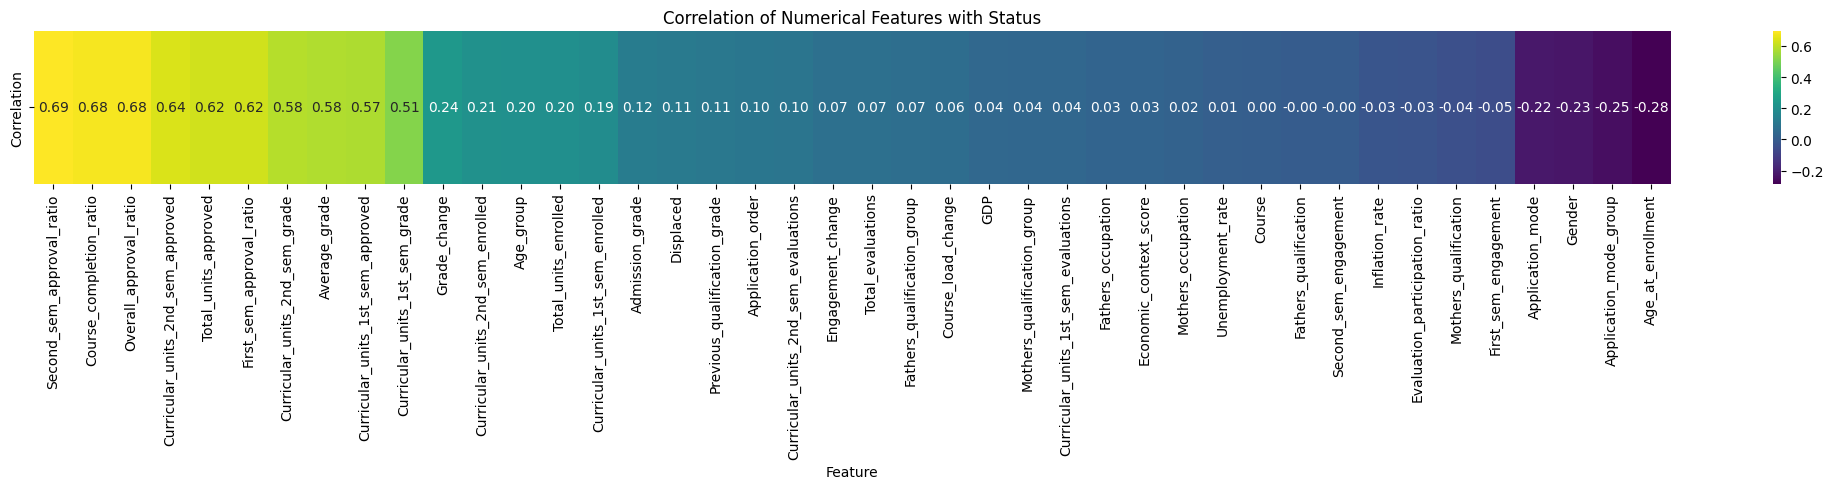

In [172]:
# Correlation Matrix based on Status
numerical_columns = data_encoding.select_dtypes(include=["int64", "float64"]).columns.drop("Status")
correlation_with_status = data_encoding[numerical_columns].corrwith(data_encoding["Status"]).sort_values(ascending=False)
correlation_with_status = correlation_with_status.dropna()

correlation_matrix = correlation_with_status.to_frame(name="Correlation").reset_index()
correlation_matrix.rename(columns={"index": "Feature"}, inplace=True)

plt.figure(figsize=(len(correlation_matrix) * 0.5, 5))
sns.heatmap(correlation_matrix.set_index("Feature").T, annot=True, cmap="viridis", fmt=".2f", cbar=True)

plt.title("Correlation of Numerical Features with Status")
plt.tight_layout()
plt.show()


In [173]:
# 4. Splitting Features and Label (Target)
data_split = data_encoding.copy()   # Copy data to avoid modifying the original dataset

# Split features and target
X = data_split.drop(columns=["Status"])
y = data_split["Status"]

In [174]:
# 5. Feature Selection
selector = SelectKBest(score_func=f_classif, k=23)
X_new = selector.fit_transform(X, y)

# Get the names of the selected features
mask = selector.get_support()
selected_features = X.columns[mask]

# Create a new DataFrame containing the selected features
X_selected = pd.DataFrame(X_new, columns=selected_features)

In [175]:
# 6. Standardization
scaler = PowerTransformer(method="yeo-johnson")
X_scaled = scaler.fit_transform(X_selected)
X_scaled = pd.DataFrame(X_scaled, columns=X_selected.columns)

print("Result of normalization:")
X_scaled.head().style.background_gradient(cmap="viridis")


Result of normalization:


,Application_mode,Gender,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Application_mode_group,Age_group,First_sem_approval_ratio,Second_sem_approval_ratio,Overall_approval_ratio,Grade_change,Average_grade,Total_units_enrolled,Total_units_approved,Course_completion_ratio,Evaluation_participation_ratio,First_sem_engagement,Second_sem_engagement
0,0.359102,1.357640,-0.206994,-2.669988,-1.690980,-1.706301,-2.648641,-2.101157,-1.586878,-1.615725,-0.777214,1.251774,-1.646100,-1.547964,-1.622124,-0.242854,-1.705875,-2.666967,-1.711654,-1.622116,-2.160871,-2.197692,-2.100464
1,0.261595,1.357640,-0.634538,-0.086578,0.522371,1.002892,-0.122427,-0.555250,0.574464,0.810871,1.286648,-0.049257,0.930908,0.935072,0.990401,-0.117434,0.963338,-0.111175,0.566441,0.990236,-0.600016,-0.557849,-0.498572
2,-1.177070,1.357640,-0.634538,-0.086578,-1.690980,-1.706301,-0.122427,-2.101157,-1.586878,-1.615725,-0.777214,-0.049257,-1.646100,-1.547964,-1.622124,-0.242854,-1.705875,-0.111175,-1.711654,-1.622116,-2.160871,-2.197692,-2.100464
3,0.359102,-0.736572,-0.206994,-0.086578,0.522371,0.670695,-0.122427,0.545080,0.255398,0.192713,-0.777214,1.251774,0.930908,0.293023,0.597252,-0.560597,0.441038,-0.111175,0.397015,0.597227,0.375384,0.035692,0.699397
4,1.073544,-0.736572,1.628500,-0.086578,0.158335,0.089554,-0.122427,-0.555250,0.574464,0.475316,1.286648,-1.098995,0.153290,0.935072,0.597252,0.594285,0.309618,-0.111175,0.397015,0.597227,-0.126955,0.339575,-0.498572


In [176]:
# 7. Data Splitting
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3539, 23), y_train=(3539,)
Testing set shape: X_test=(885, 23), y_test=(885,)


In [177]:
# 8. Data Resampling
sm = SMOTEENN(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print(f"Final training set shape: X_train={X_train_res.shape}, y_train={y_train_res.shape}")
print(f"Final testing set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Final training set shape: X_train=(3207, 23), y_train=(3207,)
Final testing set shape: X_test=(885, 23), y_test=(885,)


## Modeling

Pada tahap **Modeling**, beberapa langkah sistematis dilakukan untuk membangun dan mengevaluasi beberapa model klasifikasi. Tujuan dari tahap ini adalah untuk memilih model terbaik berdasarkan akurasi serta kinerja lainnya. Berikut adalah tahapan-tahapan yang dilakukan dalam membangun model klasifikasi:

- **Inisialisasi Model**  
    Setelah data siap, beberapa model klasifikasi diinisialisasi untuk diuji dan dilatih. Beberapa model yang digunakan dalam tahap ini antara lain:
        - Random Forest
        - Logistic Regression
        - AdaBoost
        - Linear Discriminant Analysis (LDA)
        - Quadratic Discriminant Analysis (QDA)
    Fungsi yang digunakan untuk menginisialisasi model-model ini adalah `initialize_models()`.

- **Tuning Hyperparameter**  
    Setelah model diinisialisasi, langkah berikutnya adalah melakukan tuning hyperparameter untuk mencari konfigurasi parameter terbaik yang dapat meningkatkan kinerja model. Teknik yang digunakan untuk pencarian hyperparameter adalah GridSearchCV.

    Fungsi yang digunakan untuk tuning model adalah `tune_model(model, param_grid, X_train, y_train)`.

In [178]:
def initialize_models():
    models = [
        ("Random Forest", RandomForestClassifier(random_state=42, class_weight="balanced"),
         {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}),

        ("Logistic Regression", LogisticRegression(random_state=42, class_weight="balanced"),
         {"C": [0.1, 1, 10], "penalty": ["l1", "l2"], "solver": ["liblinear"]}),

        ("Ada Boost", AdaBoostClassifier(random_state=42),
         {"n_estimators": [50, 100, 200], "learning_rate": [0.05, 0.1, 0.5]}),

        ("Linear Discriminant Analysis", LinearDiscriminantAnalysis(),
         {"solver": ["svd", "lsqr", "eigen"]}),

        ("Quadratic Discriminant Analysis", QuadraticDiscriminantAnalysis(),
         {"reg_param": [0.0, 0.1, 0.5]})
    ]
    return models


In [179]:
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_


In [180]:
def train_and_evaluate(models, X_train, y_train, X_test, y_test):
    results = []
    trained_models = []
    labels = sorted(y_test.unique())

    for name, model, param_grid in models:
        print(f"Training model: {name}")
        start_time = time.time()

        # Hyperparameter tuning
        best_model = tune_model(model, param_grid, X_train, y_train)
        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)

        # Evaluation
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(
            y_test, y_pred, labels=labels, output_dict=True, zero_division=0
        )

        recall = report["weighted avg"]["recall"]
        precision = report["weighted avg"]["precision"]
        f1_score_val = report["weighted avg"]["f1-score"]
        conf_matrix = confusion_matrix(y_test, y_pred, labels=labels)

        print(f"{name} | Accuracy: {accuracy:.4f} | Recall: {recall:.2f} | Precision: {precision:.2f} | F1: {f1_score_val:.2f}")
        print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

        # Confusion matrix visualization
        plt.figure(figsize=(5, 4))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis", cbar=False,
                    xticklabels=labels, yticklabels=labels)
        plt.title(f"{name} Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.tight_layout()
        plt.show()

        elapsed = time.time() - start_time
        print(f"Computation Time: {elapsed:.2f}s\n{'-'*50}")

        results.append({
            "Model": name,
            "Accuracy": accuracy,
            "Recall": recall,
            "Precision": precision,
            "F1-Score": f1_score_val,
            "Confusion Matrix": conf_matrix,
            "Time": elapsed
        })

        trained_models.append((name, best_model))

    return results, trained_models


Training model: Random Forest
Random Forest | Accuracy: 0.7345 | Recall: 0.73 | Precision: 0.72 | F1: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.73      0.74       284
           1       0.43      0.31      0.36       159
           2       0.79      0.89      0.84       442

    accuracy                           0.73       885
   macro avg       0.66      0.64      0.65       885
weighted avg       0.72      0.73      0.72       885



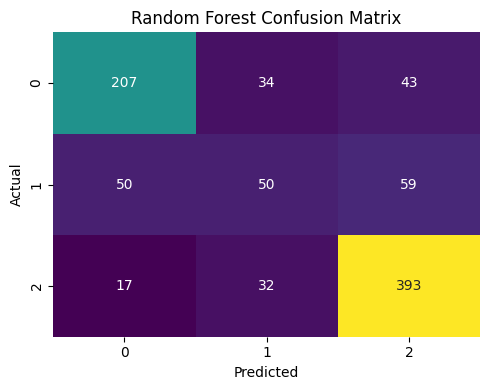

Computation Time: 8.44s
--------------------------------------------------
Training model: Logistic Regression
Logistic Regression | Accuracy: 0.7627 | Recall: 0.76 | Precision: 0.76 | F1: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       284
           1       0.53      0.47      0.50       159
           2       0.81      0.88      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.70      0.70       885
weighted avg       0.76      0.76      0.76       885



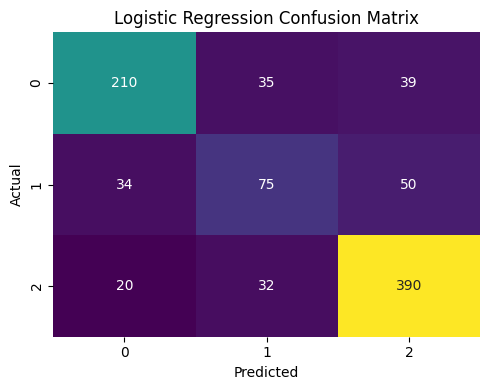

Computation Time: 6.77s
--------------------------------------------------
Training model: Ada Boost
Ada Boost | Accuracy: 0.7469 | Recall: 0.75 | Precision: 0.72 | F1: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       284
           1       0.48      0.20      0.28       159
           2       0.79      0.91      0.85       442

    accuracy                           0.75       885
   macro avg       0.67      0.64      0.63       885
weighted avg       0.72      0.75      0.72       885



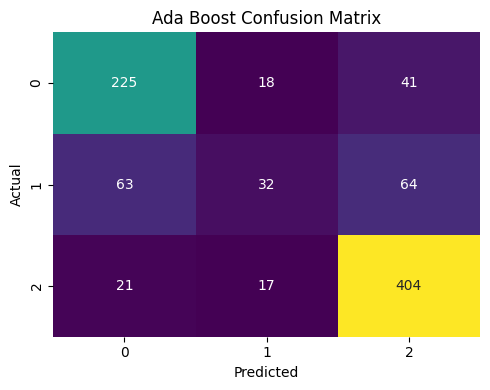

Computation Time: 8.54s
--------------------------------------------------
Training model: Linear Discriminant Analysis
Linear Discriminant Analysis | Accuracy: 0.7661 | Recall: 0.77 | Precision: 0.76 | F1: 0.76
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       284
           1       0.56      0.42      0.48       159
           2       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.69      0.70       885
weighted avg       0.76      0.77      0.76       885



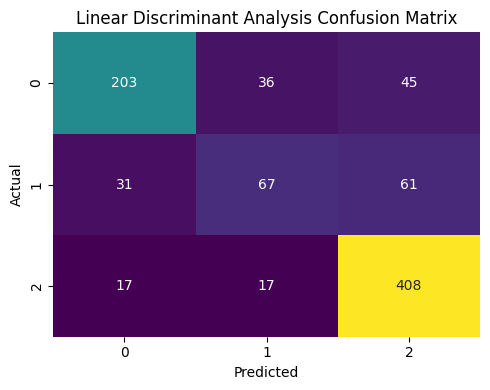

Computation Time: 0.18s
--------------------------------------------------
Training model: Quadratic Discriminant Analysis
Quadratic Discriminant Analysis | Accuracy: 0.7593 | Recall: 0.76 | Precision: 0.75 | F1: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       284
           1       0.52      0.43      0.47       159
           2       0.80      0.91      0.85       442

    accuracy                           0.76       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



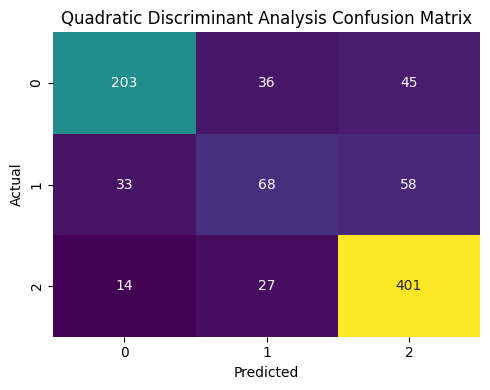

Computation Time: 0.19s
--------------------------------------------------


In [181]:
# Model Initiation
models = initialize_models()

# Train and Evaluate
results, trained_models = train_and_evaluate(models, X_train, y_train, X_test, y_test)

## Evaluation

Dalam proses evaluasi model, digunakan beberapa metrik untuk mengukur performa model berdasarkan prediksi terhadap data uji. Setiap metrik memberikan perspektif yang berbeda terkait akurasi dan kesalahan prediksi, terutama ketika data bersifat tidak seimbang.
- **Accuracy**: mengukur proporsi prediksi yang benar terhadap seluruh prediksi yang dilakukan oleh model.
- **Recall**: mengukur seberapa banyak kasus positif yang berhasil dikenali oleh model.
- **Precision**: mengukur proporsi prediksi positif yang benar-benar merupakan kelas positif.
- **F1-Score**: adalah rata-rata harmonik dari precision dan recall, memberikan keseimbangan antara keduanya.
- **Confusion Matrix**: adalah tabel 2x2 yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.
- **Computation Time**: mengukur waktu yang dibutuhkan untuk proses pelatihan, tuning, prediksi, dan evaluasi sebuah model.

In [182]:

def select_best_model(results, trained_models):
    sorted_models = sorted(results, key=lambda x: (
        -x["Accuracy"], -x["Recall"], -x["Precision"], -x["F1-Score"], x["Time"]
    ))

    best_model_name = sorted_models[0]["Model"]
    best_model = next(model for name, model in trained_models if name == best_model_name)

    print(f"\nBest Model: {best_model_name}")
    print(f"Accuracy : {sorted_models[0]['Accuracy']:.4f}")
    print(f"Recall   : {sorted_models[0]['Recall']:.4f}")
    print(f"Precision: {sorted_models[0]['Precision']:.4f}")
    print(f"F1-Score : {sorted_models[0]['F1-Score']:.4f}")
    print(f"Time     : {sorted_models[0]['Time']:.2f} seconds")

    return sorted_models, best_model

In [183]:
def visualize_model_accuracies(results):
    data = pd.DataFrame(results)
    plt.figure(figsize=(10, 6))
    colors = sns.color_palette("viridis", len(data))
    ax = sns.barplot(x="Model", y="Accuracy", data=data, palette=colors)

    for p in ax.patches:
        ax.annotate(f"{p.get_height() * 100:.2f}%",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha="center", va="center", fontsize=10, color="black", xytext=(0, 5),
                    textcoords="offset points")

    plt.title("Model Accuracy Scores")
    plt.xlabel("Models")
    plt.ylabel("Accuracy")
    plt.xticks(rotation=90)
    plt.ylim(0, 1)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


In [184]:
# Select the Best Model
sorted_results, best_model = select_best_model(results, trained_models)



Best Model: Linear Discriminant Analysis
Accuracy : 0.7661
Recall   : 0.7661
Precision: 0.7563
F1-Score : 0.7561
Time     : 0.18 seconds


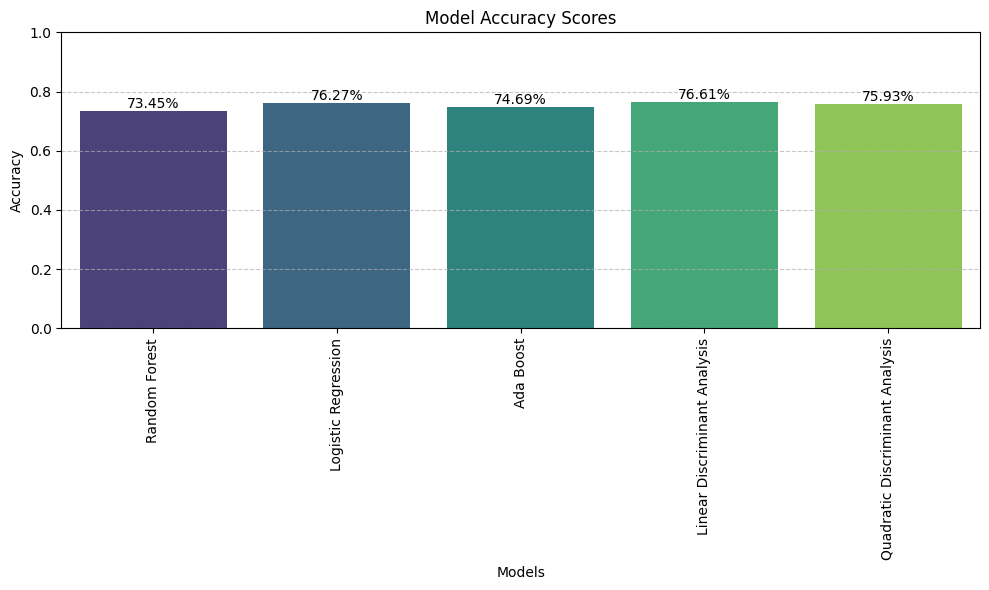

In [185]:
# Visualization of Model Accuracy
visualize_model_accuracies(results)

In [191]:
# Save Best Model
joblib.dump(best_model, "best_model.pkl")
joblib.dump(selected_features, "selected_features.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Successfully saved file")

Successfully saved file
